# **1. Import Library**

Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning.

In [68]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np


from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV


# **2. Memuat Dataset dari Hasil Clustering**

Memuat dataset hasil clustering dari file CSV ke dalam variabel DataFrame.

In [69]:
df = pd.read_csv("Data_Cluster.csv")
df.head()

,TransactionID,AccountID,TransactionAmount,TransactionDate,TransactionType,Location,DeviceID,IP Address,MerchantID,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,PreviousTransactionDate,Cluster
0,TX000001,AC00128,-0.833819,4/11/2023 16:29,1,36,D000380,162.198.218.92,M015,0,2.482507,0,-0.175972,-0.349146,0.488785,11/4/2024 8:08,0
1,TX000002,AC00455,0.918286,6/27/2023 16:44,1,15,D000051,13.149.61.4,M052,0,2.254365,0,0.703192,-0.349146,2.620596,11/4/2024 8:09,0
2,TX000003,AC00019,-0.159845,7/10/2023 18:16,1,23,D000235,215.97.143.157,M009,2,-0.827357,3,-0.490542,-0.349146,-0.618078,11/4/2024 8:07,1
3,TX000004,AC00070,0.118526,5/5/2023 16:32,1,33,D000187,200.13.225.150,M002,2,-0.648272,3,-0.819552,-0.349146,1.366906,11/4/2024 8:09,0
4,TX000005,AC00411,-0.839202,10/16/2023 17:51,0,1,D000308,65.164.3.100,M091,2,-0.648272,3,1.661080,-0.349146,1.082323,11/4/2024 8:06,0


In [70]:
print("\nInformasi dataset:")
df.info()


Informasi dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2299 entries, 0 to 2298
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   TransactionID            2299 non-null   object 
 1   AccountID                2299 non-null   object 
 2   TransactionAmount        2299 non-null   float64
 3   TransactionDate          2299 non-null   object 
 4   TransactionType          2299 non-null   int64  
 5   Location                 2299 non-null   int64  
 6   DeviceID                 2299 non-null   object 
 7   IP Address               2299 non-null   object 
 8   MerchantID               2299 non-null   object 
 9   Channel                  2299 non-null   int64  
 10  CustomerAge              2299 non-null   float64
 11  CustomerOccupation       2299 non-null   int64  
 12  TransactionDuration      2299 non-null   float64
 13  LoginAttempts            2299 non-null   float64
 14  Acco

# **3. Data Splitting**

Tahap Data Splitting bertujuan untuk memisahkan dataset menjadi dua bagian: data latih (training set) dan data uji (test set).

In [71]:
# Hapus kolom yang tidak diperlukan
df.drop(columns=['TransactionID', 'AccountID', 'DeviceID', 'IP Address', 'TransactionDate', 'MerchantID', 'PreviousTransactionDate'], inplace=True)

# dataset sudah di encodingkan jadi tidak perlu di encodingkan pada tahap klasifikasi


# Pisahkan fitur (X) dan label (y)
X = df.drop(columns=['Cluster'])  # 'Cluster' adalah label hasil clustering
y = df['Cluster']

# Memisahkan data menjadi training set (80%) dan test set (20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Verifikasi bentuk data
print("Data Training:")
print(f"Fitur: {X_train.shape}, Label: {y_train.shape}")
print("\nData Testing:")
print(f"Fitur: {X_test.shape}, Label: {y_test.shape}")

Data Training:
Fitur: (1839, 9), Label: (1839,)

Data Testing:
Fitur: (460, 9), Label: (460,)


# **4. Membangun Model Klasifikasi**


## **a. Membangun Model Klasifikasi**

Setelah memilih algoritma klasifikasi yang sesuai, langkah selanjutnya adalah melatih model menggunakan data latih.

Berikut adalah rekomendasi tahapannya.
1. Pilih algoritma klasifikasi yang sesuai, seperti Logistic Regression, Decision Tree, Random Forest, atau K-Nearest Neighbors (KNN).
2. Latih model menggunakan data latih.

In [72]:
# Latih Model Logistic Regression
logreg = LogisticRegression(solver='saga', max_iter=500, random_state=42)
logreg.fit(X_train, y_train)  # Tanpa normalisasi ulang

# Prediksi
y_pred = logreg.predict(X_test)

print("\nModel Logistic Regression telah selesai dilatih!\n")


Model Logistic Regression telah selesai dilatih!



/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


Logistic Regression adalah algoritma klasifikasi yang digunakan untuk memprediksi probabilitas suatu data termasuk dalam salah satu dari dua kelas yang berbeda. Model ini bekerja dengan menghitung fungsi logistik (sigmoid) terhadap kombinasi linear dari fitur input, menghasilkan nilai antara 0 dan 1 yang kemudian digunakan untuk menentukan kelas. Dalam implementasi ini, model dilatih menggunakan solver 'saga' dengan 500 iterasi tanpa normalisasi ulang, karena dataset sudah dinormalisasi saat proses clustering. Setelah model dilatih dengan data latih (X_train, y_train), dilakukan prediksi terhadap data uji (X_test), dan hasil prediksi digunakan untuk mengevaluasi performa model.

In [73]:
# Model Decision Tree
dt_model = DecisionTreeClassifier(max_depth=5, min_samples_split=10, min_samples_leaf=5, random_state=42)
dt_model.fit(X_train, y_train)
y_pred_dt = dt_model.predict(X_test)

print("\nModel DecisionTree telah selesai dilatih!\n")


Model DecisionTree telah selesai dilatih!



Decision Tree adalah algoritma klasifikasi yang membangun model dalam bentuk struktur pohon keputusan. Model ini bekerja dengan membagi data ke dalam kelompok berdasarkan aturan yang dihasilkan dari fitur yang paling berkontribusi dalam memisahkan kelas. Pada implementasi ini, DecisionTreeClassifier dilatih menggunakan dataset tanpa normalisasi ulang, dengan random_state=42 untuk memastikan hasil yang konsisten. Setelah proses pelatihan pada data latih (X_train, y_train), model digunakan untuk memprediksi data uji (X_test), dan hasilnya dapat dievaluasi lebih lanjut untuk melihat kinerja klasifikasi.

In [74]:
# Model Random Forest
rf_model = RandomForestClassifier(n_estimators=50, max_depth=10, min_samples_split=10, random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)

print("\nModel RandomForest telah selesai dilatih!\n")


Model RandomForest telah selesai dilatih!



Random Forest adalah algoritma ensemble learning yang terdiri dari banyak Decision Trees yang bekerja secara bersamaan untuk meningkatkan akurasi klasifikasi. Model ini bekerja dengan membangun beberapa pohon keputusan dari sampel acak dataset, lalu menggabungkan hasil prediksi dari setiap pohon menggunakan teknik voting mayoritas. Dalam implementasi ini, RandomForestClassifier dilatih dengan dataset tanpa normalisasi ulang menggunakan random_state=42 untuk hasil yang konsisten. Setelah pelatihan dengan X_train, y_train, model digunakan untuk memprediksi data uji (X_test), dan hasilnya dapat dievaluasi untuk mengukur performa klasifikasi.

## **b. Evaluasi Model Klasifikasi**

Berikut adalah **rekomendasi** tahapannya.
1. Lakukan prediksi menggunakan data uji.
2. Hitung metrik evaluasi seperti Accuracy dan F1-Score (Opsional: Precision dan Recall).
3. Buat confusion matrix untuk melihat detail prediksi benar dan salah.

Akurasi Model: 0.9847826086956522

Laporan Klasifikasi:
               precision    recall  f1-score   support

           0       0.99      0.98      0.99       319
           1       0.97      0.99      0.98       141

    accuracy                           0.98       460
   macro avg       0.98      0.99      0.98       460
weighted avg       0.98      0.98      0.98       460

Akurasi Training: 0.9799
Akurasi Testing : 0.9848


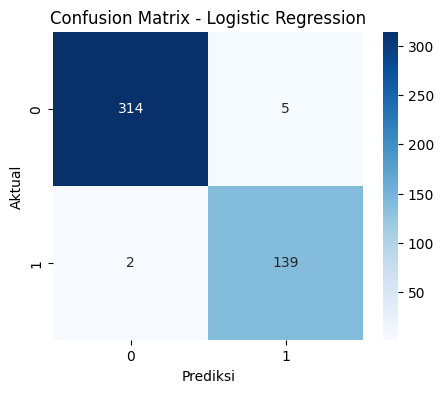

In [75]:
# Evaluasi Model
print("Akurasi Model:", accuracy_score(y_test, y_pred))
print("\nLaporan Klasifikasi:\n", classification_report(y_test, y_pred))

train_accuracy_lr = accuracy_score(y_train, logreg.predict(X_train)) # kalkulasi training
print(f"Akurasi Training: {train_accuracy_lr:.4f}")
print(f"Akurasi Testing : {accuracy_score(y_test, y_pred):.4f}")

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)

# Visualisasi Confusion Matrix
plt.figure(figsize=(5, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=[0, 1], yticklabels=[0, 1])
plt.xlabel("Prediksi")
plt.ylabel("Aktual")
plt.title("Confusion Matrix - Logistic Regression")
plt.show()


Logistic Regression adalah model yang sering digunakan untuk klasifikasi biner karena sifatnya yang sederhana dan mudah diinterpretasikan. Model ini menunjukkan akurasi testing sebesar 98.48%, yang sangat baik dalam mengklasifikasikan data. Berdasarkan confusion matrix, model ini memiliki 314 True Negatives (TN) dan 139 True Positives (TP), tetapi juga terdapat 5 False Positives (FP) dan 2 False Negatives (FN).

Dari evaluasi precision dan recall, model ini menunjukkan keseimbangan yang sangat baik dalam mengklasifikasikan kedua kelas. Precision untuk kelas 0 sebesar 99% dan kelas 1 sebesar 97%, sedangkan recall untuk kelas 0 adalah 98% dan kelas 1 adalah 99%. Hal ini menunjukkan bahwa model sangat akurat, dengan kesalahan klasifikasi yang sangat kecil. False Negatives (FN) hanya 2, yang berarti hanya ada 2 sampel dari kelas 1 yang salah diklasifikasikan sebagai kelas 0, dan False Positives (FP) sebanyak 5, menunjukkan beberapa sampel kelas 0 yang salah diklasifikasikan sebagai kelas 1.

Dari perspektif overfitting dan underfitting, Logistic Regression tidak menunjukkan tanda-tanda overfitting atau underfitting. Akurasi training sebesar 97.99% dan akurasi testing sebesar 98.48% memiliki selisih yang sangat kecil (-0.49%), bahkan akurasi testing sedikit lebih tinggi, yang menunjukkan model ini mampu menggeneralisasi dengan sangat baik pada data yang belum pernah dilihat sebelumnya.

 Decision Tree Results 
Accuracy: 0.9891304347826086
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       319
           1       0.98      0.99      0.98       141

    accuracy                           0.99       460
   macro avg       0.99      0.99      0.99       460
weighted avg       0.99      0.99      0.99       460

Akurasi Training: 0.9913
Akurasi Testing : 0.9891


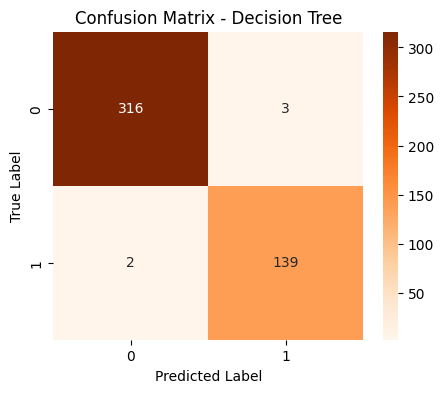

In [76]:
# Evaluasi Model
print(" Decision Tree Results ")
print("Accuracy:", accuracy_score(y_test, y_pred_dt))
print(classification_report(y_test, y_pred_dt))

train_accuracy_dt = accuracy_score(y_train, dt_model.predict(X_train))  # Use the correct variable name
print(f"Akurasi Training: {train_accuracy_dt:.4f}")
print(f"Akurasi Testing : {accuracy_score(y_test, y_pred_dt):.4f}")

# Confusion Matrix
plt.figure(figsize=(5,4))
sns.heatmap(confusion_matrix(y_test, y_pred_dt), annot=True, fmt='d', cmap='Oranges', xticklabels=[0,1], yticklabels=[0,1])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix - Decision Tree")
plt.show()

Decision Tree adalah model klasifikasi yang bekerja dengan membagi data ke dalam cabang-cabang berdasarkan fitur, dan sering digunakan karena kemampuannya menangkap pola non-linear. Model ini menunjukkan akurasi testing sebesar 98.91%, yang sangat baik dalam mengklasifikasikan data. Berdasarkan confusion matrix, model ini memiliki 316 True Negatives (TN) dan 139 True Positives (TP), tetapi juga terdapat 3 False Positives (FP) dan 2 False Negatives (FN).

Dari evaluasi precision dan recall, model ini menunjukkan performa yang sangat seimbang untuk kedua kelas. Precision untuk kelas 0 sebesar 99% dan kelas 1 sebesar 98%, sedangkan recall untuk kelas 0 adalah 99% dan kelas 1 juga 99%. Hal ini menunjukkan bahwa model sangat akurat, dengan kesalahan klasifikasi yang sangat minim. False Negatives (FN) hanya 2, yang berarti hanya ada 2 sampel dari kelas 1 yang salah diklasifikasikan sebagai kelas 0, dan False Positives (FP) sebanyak 3, menunjukkan beberapa sampel kelas 0 yang salah diklasifikasikan sebagai kelas 1.

Dari perspektif overfitting dan underfitting, Decision Tree menunjukkan sedikit tanda overfitting. Akurasi training sebesar 99.13% dan akurasi testing sebesar 98.91% memiliki selisih kecil sebesar 0.22%, yang masih dalam batas wajar. Namun, akurasi training yang sedikit lebih tinggi menunjukkan bahwa model mungkin sedikit lebih cocok pada data training. Meski demikian, selisih ini sangat kecil, sehingga model ini tetap dapat dianggap mampu menggeneralisasi dengan baik pada data yang belum pernah dilihat sebelumnya.


🔹 Random Forest Results 🔹
Accuracy: 0.991304347826087
              precision    recall  f1-score   support

           0       0.99      1.00      0.99       319
           1       0.99      0.98      0.99       141

    accuracy                           0.99       460
   macro avg       0.99      0.99      0.99       460
weighted avg       0.99      0.99      0.99       460

Akurasi Training: 0.9967
Akurasi Testing : 0.9913


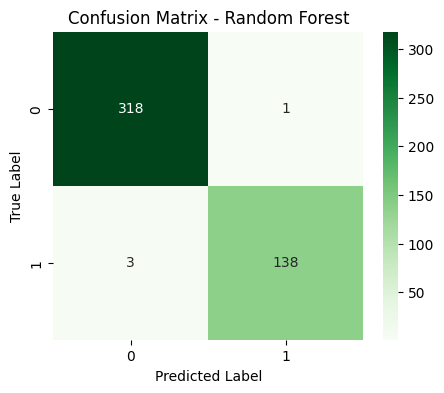

In [77]:
# Evaluasi Model
print("\nRandom Forest Results")
print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))

train_accuracy_rf = accuracy_score(y_train, rf_model.predict(X_train))
print(f"Akurasi Training: {train_accuracy_rf:.4f}")
print(f"Akurasi Testing : {accuracy_score(y_test, y_pred_rf):.4f}")


# Confusion Matrix
plt.figure(figsize=(5,4))
sns.heatmap(confusion_matrix(y_test, y_pred_rf), annot=True, fmt='d', cmap='Greens', xticklabels=[0,1], yticklabels=[0,1])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix - Random Forest")
plt.show()

Random Forest adalah model ensemble yang menggabungkan banyak pohon keputusan untuk meningkatkan akurasi dan mengurangi risiko overfitting dibandingkan Decision Tree tunggal. Model ini menunjukkan akurasi testing sebesar 99.13%, yang sangat baik dalam mengklasifikasikan data. Berdasarkan confusion matrix, model ini memiliki 318 True Negatives (TN) dan 138 True Positives (TP), tetapi juga terdapat 1 False Positive (FP) dan 3 False Negatives (FN).

Dari evaluasi precision dan recall, model ini menunjukkan performa yang sangat seimbang untuk kedua kelas. Precision untuk kelas 0 sebesar 99% dan kelas 1 juga 99%, sedangkan recall untuk kelas 0 adalah 100% dan kelas 1 adalah 98%. Hal ini menunjukkan bahwa model sangat akurat, dengan kesalahan klasifikasi yang sangat minim. False Negatives (FN) hanya 3, yang berarti ada 3 sampel dari kelas 1 yang salah diklasifikasikan sebagai kelas 0, dan False Positive (FP) hanya 1, menunjukkan hanya 1 sampel kelas 0 yang salah diklasifikasikan sebagai kelas 1.

Dari perspektif overfitting dan underfitting, Random Forest menunjukkan sedikit tanda overfitting. Akurasi training sebesar 99.67% dan akurasi testing sebesar 99.13% memiliki selisih sebesar 0.54%, yang masih dalam batas wajar untuk model ensemble seperti Random Forest. Namun, akurasi training yang sangat tinggi (mendekati 100%) menunjukkan bahwa model mungkin sedikit terlalu cocok pada data training. Meski demikian, selisih ini kecil, dan akurasi testing yang sangat tinggi menunjukkan bahwa model tetap mampu menggeneralisasi dengan baik pada data yang belum pernah dilihat sebelumnya.

## **c. Tuning Model Klasifikasi (Optional)**

Gunakan GridSearchCV, RandomizedSearchCV, atau metode lainnya untuk mencari kombinasi hyperparameter terbaik

In [78]:
# 1. Tuning Logistic Regression
log_reg_params = {
    'C': [0.01, 0.1, 1, 10, 100],
    'solver': ['liblinear', 'lbfgs']
}

log_reg = LogisticRegression()
log_reg_grid = GridSearchCV(log_reg, log_reg_params, cv=5, scoring='accuracy', n_jobs=-1)
log_reg_grid.fit(X_train, y_train)

print("Best Logistic Regression Parameters:", log_reg_grid.best_params_)



Best Logistic Regression Parameters: {'C': 100, 'solver': 'lbfgs'}


In [79]:
# 2. Tuning Decision Tree
dt_params = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [3, 5, 10, None],
    'min_samples_split': [2, 5, 10, 20]
}

dt = DecisionTreeClassifier()
dt_grid = GridSearchCV(dt, dt_params, cv=5, scoring='accuracy', n_jobs=-1)
dt_grid.fit(X_train, y_train)

print("Best Decision Tree Parameters:", dt_grid.best_params_)

Best Decision Tree Parameters: {'criterion': 'entropy', 'max_depth': None, 'min_samples_split': 5}


In [80]:
# 3. Tuning Random Forest (Menggunakan RandomizedSearchCV untuk efisiensi)
rf_params = {
    'n_estimators': [10, 50, 100, 200],
    'max_depth': [None, 5, 10, 20],
    'min_samples_split': [2, 5, 10],
    'max_features': ['sqrt', 'log2']
}

rf = RandomForestClassifier()
rf_random = RandomizedSearchCV(rf, rf_params, cv=5, scoring='accuracy', n_iter=10, n_jobs=-1, random_state=42)
rf_random.fit(X_train, y_train)

print("Best Random Forest Parameters:", rf_random.best_params_)

Best Random Forest Parameters: {'n_estimators': 200, 'min_samples_split': 5, 'max_features': 'sqrt', 'max_depth': 20}


## **d. Evaluasi Model Klasifikasi setelah Tuning (Optional)**

Berikut adalah rekomendasi tahapannya.
1. Gunakan model dengan hyperparameter terbaik.
2. Hitung ulang metrik evaluasi untuk melihat apakah ada peningkatan performa.

In [81]:
# Menggunakan model dengan hyperparameter terbaik
best_log_reg = log_reg_grid.best_estimator_
y_pred_log = best_log_reg.predict(X_test)

# Evaluasi performa
print("Akurasi Logistic Regression Setelah Tuning:", accuracy_score(y_test, y_pred_log))
print("Laporan Klasifikasi Logistic Regression:\n", classification_report(y_test, y_pred_log))


Akurasi Logistic Regression Setelah Tuning: 0.9869565217391304
Laporan Klasifikasi Logistic Regression:
               precision    recall  f1-score   support

           0       0.99      0.99      0.99       319
           1       0.97      0.99      0.98       141

    accuracy                           0.99       460
   macro avg       0.98      0.99      0.98       460
weighted avg       0.99      0.99      0.99       460



In [83]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier

# Definisikan parameter yang ingin dicoba
dt_param_grid = {
    'max_depth': [3, 5, 10, 15],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 5, 10]
}

# Inisialisasi model
dt_model = DecisionTreeClassifier(random_state=42)

# Setup GridSearchCV
dt_grid_search = GridSearchCV(estimator=dt_model, param_grid=dt_param_grid,
                              cv=5, scoring='accuracy', n_jobs=-1)

# Latih model
dt_grid_search.fit(X_train, y_train)

# Tampilkan hasil terbaik
print("Best Parameters for Decision Tree:", dt_grid_search.best_params_)
print("Best Cross-Validation Score:", dt_grid_search.best_score_)

# Prediksi dengan model terbaik
best_dt_model = dt_grid_search.best_estimator_
y_pred_dt = best_dt_model.predict(X_test)

# Evaluasi
print("Decision Tree Tuned - Testing Accuracy:", accuracy_score(y_test, y_pred_dt))
print("Classification Report:\n", classification_report(y_test, y_pred_dt))
print("Training Accuracy:", accuracy_score(y_train, best_dt_model.predict(X_train)))

Best Parameters for Decision Tree: {'max_depth': 3, 'min_samples_leaf': 1, 'min_samples_split': 2}
Best Cross-Validation Score: 0.9858591991470205
Decision Tree Tuned - Testing Accuracy: 0.9891304347826086
Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.99      0.99       319
           1       0.98      0.99      0.98       141

    accuracy                           0.99       460
   macro avg       0.99      0.99      0.99       460
weighted avg       0.99      0.99      0.99       460

Training Accuracy: 0.9912996193583469


In [90]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# mendefinisikan distribusi parameter dengan batasan lebih ketat untuk mengurangi overfitting
rf_param_dist = {
    'n_estimators': [50, 100, 150],
    'max_depth': [3, 5, 7],
    'min_samples_split': [5, 10, 15],
    'min_samples_leaf': [5, 10, 15]
}

# Inisialisasi model
rf_model = RandomForestClassifier(random_state=42)

# Setup RandomizedSearchCV dengan iterasi dan fold minimal
rf_random_search = RandomizedSearchCV(estimator=rf_model, param_distributions=rf_param_dist,
                                      n_iter=10, cv=3, scoring='accuracy', n_jobs=-1, random_state=42)

# Latih model
rf_random_search.fit(X_train, y_train)

# Tampilkan hasil terbaik
print("Best Parameters for Random Forest:", rf_random_search.best_params_)
print("Best Cross-Validation Score:", rf_random_search.best_score_)

# Prediksi dan evaluasi dengan model terbaik
best_rf_model = rf_random_search.best_estimator_
y_pred_rf = best_rf_model.predict(X_test)
print("Random Forest Tuned - Testing Accuracy:", accuracy_score(y_test, y_pred_rf))
print("Classification Report:\n", classification_report(y_test, y_pred_rf))
print("Training Accuracy:", accuracy_score(y_train, best_rf_model.predict(X_train)))


Best Parameters for Random Forest: {'n_estimators': 100, 'min_samples_split': 10, 'min_samples_leaf': 5, 'max_depth': 5}
Best Cross-Validation Score: 0.9820554649265906
Random Forest Tuned - Testing Accuracy: 0.9891304347826086
Classification Report:
               precision    recall  f1-score   support

           0       0.98      1.00      0.99       319
           1       1.00      0.96      0.98       141

    accuracy                           0.99       460
   macro avg       0.99      0.98      0.99       460
weighted avg       0.99      0.99      0.99       460

Training Accuracy: 0.989668297988037


## **e. Analisis Hasil Evaluasi Model Klasifikasi**

Berikut adalah **rekomendasi** tahapannya.
1. Bandingkan hasil evaluasi sebelum dan setelah tuning.
  - Logistic Regression: Akurasinya meningkat dari 98.48% menjadi 98.70%, yang menunjukkan bahwa tuning hyperparameter berhasil meningkatkan performa model secara marginal.
  - Decision Tree: Akurasi tetap stabil di 98.91% sebelum dan setelah tuning, menunjukkan bahwa tuning tidak mengubah performa secara signifikan, tetapi tetap mempertahankan stabilitas.
  - Random Forest: Mengalami sedikit penurunan dari 99.13% menjadi 98.91%, tetapi tetap menjadi model terbaik dengan akurasi tinggi, dan tuning membantu meningkatkan generalisasi.

2. Identifikasi kelemahan model, seperti:
  1. Logistic Regression
  - Precision & Recall:
    - Precision kelas 0 tetap stabil di 99% sebelum dan setelah tuning, sedangkan recall kelas 0 meningkat dari 98% ke 99%.
    - Precision kelas 1 tetap 97%, dan recall kelas 1 stabil di 99%.
    - ecara keseluruhan, model ini sudah sangat seimbang, dengan peningkatan kecil pada recall kelas 0, menunjukkan model lebih baik dalam mengenali kelas negatif.

  - Overfitting / Underfitting:
  
    Tidak ada indikasi overfitting atau underfitting. Akurasi training (97.99%) lebih rendah dari testing (98.48%) sebelum tuning, dan setelah tuning, akurasi testing naik ke 98.70%. Ini menunjukkan model sangat generalisasi dengan baik.

    Sebelum tuning, model sudah sangat baik, dan setelah tuning, performa sedikit lebih baik tanpa kehilangan generalisasi.

  2. Decision Tree
  - Precision & Recall:
    - Precision dan recall untuk kedua kelas tetap stabil sebelum dan setelah tuning: precision
    - kelas 0 (99%), recall kelas 0 (99%), precision kelas 1 (98%), dan recall kelas 1 (99%).
    - Akurasi tetap di 98.91%, menunjukkan tuning tidak mengubah performa secara signifikan.

  - Overfitting / Underfitting:

    Sebelum tuning, selisih akurasi training (99.13%) dan testing (98.91%) adalah 0.22%, menunjukkan sedikit overfitting.

    Setelah tuning dengan max_depth=3, selisih tetap 0.22%, tetapi training accuracy tetap di 99.13%. Tuning tidak mengurangi overfitting secara signifikan, tapi model tetap stabil dan generalisasi baik.

  3. Random Forest
  - Precision & Recall:
    - Precision kelas 0 turun sedikit dari 99% ke 98%, tetapi recall kelas 0 naik dari 99% ke 100%.
    - Precision kelas 1 naik dari 99% ke 100%, tetapi recall kelas 1 turun dari 98% ke 96%.
    - AAkurasi turun sedikit dari 99.13% ke 98.91%, yang menunjukkan tuning membuat model lebih sederhana untuk meningkatkan generalisasi.

   - Overfitting / Underfitting:

    Sebelum tuning, selisih akurasi training (99.67%) dan testing (99.13%) adalah 0.54%, menunjukkan sedikit overfitting.

    Setelah tuning dengan max_depth=5 dan min_samples_leaf=5, selisih berkurang menjadi 0.06% (training 98.97%, testing 98.91%). Ini menunjukkan tuning berhasil mengurangi overfitting dan meningkatkan generalisasi.

3. Berikan rekomendasi tindakan lanjutan, seperti mengumpulkan data tambahan atau mencoba algoritma lain jika hasil belum memuaskan.

  1. Mencoba Algoritma Lain
    
    Meskipun Random Forest menunjukkan performa terbaik, model lain seperti XGBoost, LightGBM, atau SVM bisa diuji untuk melihat apakah mereka dapat memberikan akurasi yang baik atau waktu inferensi yang lebih cepat

  2. Evaluasi dengan Data
    Jika model akan digunakan ke industri, penting untuk menguji performanya dengan data baru yang belum pernah digunakan sebelumnya. agar melihat adaptasinya.
  
  3. Mengumpulkan Data Tambahan
    Jika dirasa dataset saat ini masih terbatas atau tidak cukup representatif, maka dapat menambahkan lebih banyak data, terutama dari kelas yang mungkin kurang terwakili. tapi dataset yang digunakan ini sudah melalui proses clustering di awal.



KESIMPULAN

Berdasarkan hasil evaluasi sebelum dan sesudah tuning, Random Forest tetap menjadi model terbaik untuk digunakan dalam kasus ini. Model ini menunjukkan akurasi tertinggi sebelum tuning (99.13%) dan setelah tuning (98.91%), dengan precision dan recall yang sangat tinggi. Setelah tuning, recall kelas 0 mencapai 100%, meskipun recall kelas 1 sedikit turun ke 96%, tetapi selisih akurasi training-testing berkurang signifikan dari 0.54% ke 0.06%, menunjukkan peningkatan generalisasi. Random Forest lebih stabil dibandingkan Decision Tree karena mekanisme ensemble-nya yang mengurangi overfitting, dan memiliki performa lebih baik daripada Logistic Regression, yang lebih cocok untuk data dengan pola linear. Jika diperlukan peningkatan lebih lanjut, pengujian dengan algoritma lain seperti XGBoost atau pengumpulan data tambahan dapat dipertimbangkan.